In [3]:
# Step 1: Import required packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

In [4]:
# Step 2: Import data set
fb = pd.read_excel('FB.xlsx')

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(fb)
profile.to_file(output_file="output7.html")
profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
fb1 = fb.drop(axis=1, columns = ['status_id'])

In [7]:
fb1

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  status_link  status_photo  \
0             1         1           0            0             0   
1             0         0           0            0             1   
2             1         0           0            0             0   
3             0         0           0            0             1   
4             0         0           0            0             1   
...         ...       ...         ...          ...           ...   
7045          0         0           0            0             1   
7046          1         0           0            0             1   
7047          0         0           0            0             1   
7048          0         0           0            0             1   
7049          0         0           0            0             1   

      status_status  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
7045              0  
7046              0  
7047              0  
7048              0  
7049              0  

[7050 rows x 12 columns]

In [8]:
from scipy.stats import zscore
fb1=fb1.apply(zscore)
fb1.head()

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.646104      0.323350    1.686879   0.482727   1.983266  0.196196   
1      -0.173192     -0.252206   -0.304144  -0.144720  -0.318454 -0.147879   
2      -0.006738      0.013089    0.129017  -0.024571   0.206938 -0.033187   
3      -0.257499     -0.252206   -0.304144  -0.231495  -0.318454 -0.147879   
4      -0.037003     -0.252206   -0.304144  -0.024571  -0.093286 -0.147879   

   num_hahas  num_sads  num_angrys  status_link  status_photo  status_status  
0   0.076713  0.473570   -0.155748    -0.094957     -1.245993      -0.233666  
1  -0.176010 -0.152587   -0.155748    -0.094957      0.802573      -0.233666  
2   0.076713 -0.152587   -0.155748    -0.094957     -1.245993      -0.233666  
3  -0.176010 -0.152587   -0.155748    -0.094957      0.802573      -0.233666  
4  -0.176010 -0.152587   -0.155748    -0.094957      0.802573      -0.233666

In [9]:
fb1.drop_duplicates(inplace = True)

In [22]:
dup = fb1.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

fb1[dup]

Number of duplicate rows = 0


Empty DataFrame
Columns: [num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys, status_link, status_photo, status_status]
Index: []

In [10]:
fb1.isnull().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_link      0
status_photo     0
status_status    0
dtype: int64

In [11]:
fb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reactions  4987 non-null   float64
 1   num_comments   4987 non-null   float64
 2   num_shares     4987 non-null   float64
 3   num_likes      4987 non-null   float64
 4   num_loves      4987 non-null   float64
 5   num_wows       4987 non-null   float64
 6   num_hahas      4987 non-null   float64
 7   num_sads       4987 non-null   float64
 8   num_angrys     4987 non-null   float64
 9   status_link    4987 non-null   float64
 10  status_photo   4987 non-null   float64
 11  status_status  4987 non-null   float64
dtypes: float64(12)
memory usage: 506.5 KB


In [12]:
#Standardise
X_std = StandardScaler().fit_transform(fb1)

In [13]:
#Compute covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00020056  0.11585517  0.216528    0.99447517  0.26888133  0.24710905
   0.15480723  0.05554976  0.11181742  0.01274576 -0.10510599  0.07668285]
 [ 0.11585517  1.00020056  0.62958296  0.06443212  0.50596376  0.15157544
   0.31324944  0.24602086  0.22744336 -0.03279958 -0.30544292 -0.07353818]
 [ 0.216528    0.62958296  1.00020056  0.13324159  0.81320861  0.401519
   0.38807879  0.20424698  0.32045392 -0.03728136 -0.37363821 -0.09651658]
 [ 0.99447517  0.06443212  0.13324159  1.00020056  0.16623657  0.18272074
   0.09633722  0.03046579  0.0710044   0.01762575 -0.06970179  0.08853461]
 [ 0.26888133  0.50596376  0.81320861  0.16623657  1.00020056  0.50432523
   0.49880061  0.21190169  0.38424926 -0.04166126 -0.36956122 -0.09653596]
 [ 0.24710905  0.15157544  0.401519    0.18272074  0.50432523  1.00020056
   0.28130075  0.08313226  0.18418687 -0.01669109 -0.08374197 -0.01474388]
 [ 0.15480723  0.31324944  0.38807879  0.09633722  0.49880061  0.28130075
   1.00020056  

In [27]:
# Calculate eigenvectors and eigenvalues
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[ 0.38038503  0.17045348 -0.43876114 -0.00859519  0.57786103  0.34396999
  -0.04208268 -0.01263381 -0.27181853  0.32496736 -0.00304023]
 [ 0.47921858 -0.66237131  0.4779151  -0.03623708  0.05799251  0.07829325
   0.02880412 -0.13694134 -0.1437323   0.12117298 -0.19359855]
 [ 0.12600476 -0.01147197 -0.02451182  0.18928629 -0.07354694 -0.65867811
   0.02357312  0.43365068 -0.20087783  0.51154368  0.13288196]
 [ 0.49237028  0.71021302  0.44670556 -0.06006827 -0.14543717 -0.058519
   0.03612246 -0.11865572 -0.01955001 -0.04387261 -0.08801967]
 [ 0.29816468 -0.07642032 -0.41152373 -0.10335133  0.10120975 -0.49600229
   0.06104994 -0.05989076  0.00725159 -0.51475928 -0.44341751]
 [ 0.3292736  -0.12123861 -0.09217105 -0.11066947 -0.02858502 -0.08291284
   0.01626866 -0.06441103 -0.04977593 -0.34469411  0.85014122]
 [ 0.18248623 -0.02514528  0.01278884 -0.0314097  -0.16212584  0.33662894
  -0.26369772  0.81256011 -0.03986409 -0.28886069 -0.10243278]
 [ 0.26498398 -0.05586398 -0.

In [28]:
# Compute the feature vector
# Rearrange the eigenvalues in descending order. This represents the significance of
# the principal components in descending order
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.3483121933997175
0.15322519343928087
0.3541164156173189
1.2928594812911165
0.501801467046245
1.0881654185210736
1.0256738633731253
0.9159212194265447
0.8280139400020685
0.7911468696500367
0.7029701155298993


In [29]:
# Use the PCA() function to reduce the dimensionality of the data set
# The below code snippet uses the pre-defined PCA() function provided by the sklearn package in order to transform the data.
# The n_components parameter denotes the number of Principal Components you want to fit your data with
pca = sklearnPCA(n_components=2)
pca.fit_transform(fb1)
print(pca.explained_variance_ratio_)

[0.80690379 0.18168954]


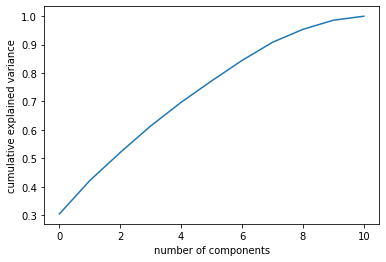

In [30]:
# Projecting the variance w.r.t the Principle Components
# graph a scree plot. In statistics, a scree plot expresses the variance associated with each principal component
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

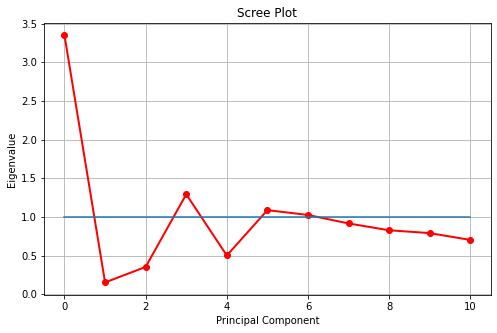

In [31]:
# how many principal components are preferred?
fig = plt.figure(figsize=(8,5))
sing_vals = range(fb1.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,11),np.ones(11))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [32]:
# Find out the eigenvector of the 5th component
eig_vecs[4] #fifth component

array([ 0.29816468, -0.07642032, -0.41152373, -0.10335133,  0.10120975,
       -0.49600229,  0.06104994, -0.05989076,  0.00725159, -0.51475928,
       -0.44341751])

In [33]:
# How much cumulative variance is explained by first four components?
tot = sum(eig_vals) # calculate the total value of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # looping to calculate variance explained %
cum_var_exp = np.cumsum(var_exp) # using numpy cumsum to create an array of cumsum of var_exp
cum_var_exp

array([ 30.43309805,  42.18400928,  52.07443853,  61.39687666,
        69.72176355,  77.2476536 ,  84.43845567,  90.82781162,
        95.3887284 ,  98.60732301, 100.        ])

In [34]:
# What is explained variances for each of 4 components while performing PCA?
pca = sklearnPCA(n_components=4)
X_pca= pca.fit_transform(X_std)
pca.explained_variance_

array([3.34831219, 1.29285948, 1.08816542, 1.02567386])

In [35]:
# Which of the following is linear equation of third Principal component in terms of eigenvectors?
fb1.columns

Index(['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'status_link', 'status_photo',
       'status_status'],
      dtype='object')

In [36]:
pca.components_[2]

array([-0.34396999, -0.07829325,  0.65867811,  0.058519  ,  0.49600229,
        0.08291284, -0.33662894,  0.00109214, -0.10897703,  0.2199518 ,
        0.10865381])

In [38]:
print('The Linear eq of 3rd component: ')
for i in range(0,fb1.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[2][i],3),fb1.columns[i]),end=' + ')

The Linear eq of 3rd component: 
-0.344 * num_comments + -0.078 * num_shares + 0.659 * num_likes + 0.059 * num_loves + 0.496 * num_wows + 0.083 * num_hahas + -0.337 * num_sads + 0.001 * num_angrys + -0.109 * status_link + 0.22 * status_photo + 0.109 * status_status + 